In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.image as img
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
DATASET_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/train.csv'
TEST_PATH = 'C:/Temp/files/GeekBrains/ds_python_libs/final/test.csv'

**File descriptions**

* train.csv - the training set
* test.csv - the test set
* sampleSubmission.csv - a sample submission file in the correct format

**Data fields**
* Id - идентификационный номер квартиры
* DistrictId - идентификационный номер района
* Rooms - количество комнат
* Square - площадь
* LifeSquare - жилая площадь
* KitchenSquare - площадь кухни
* Floor - этаж
* HouseFloor - количество этажей в доме
* HouseYear - год постройки дома
* Ecology_1, Ecology_2, Ecology_3 - экологические показатели местности
* Social_1, Social_2, Social_3 - социальные показатели местности
* Healthcare_1, Helthcare_2 - показатели местности, связанные с охраной здоровья
* Shops_1, Shops_2 - показатели, связанные с наличием магазинов, торговых центров
* Price - цена квартиры

## Read data

In [3]:
df = pd.read_csv(DATASET_PATH)
df.head(5)

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Shops_2,Price
0,14038,35,2.0,47.981561,29.442751,6.0,7,9.0,1969,0.089040,B,B,33,7976,5,NaN,0,11,B,184966.930730
1,15053,41,3.0,65.683640,40.049543,8.0,7,9.0,1978,0.000070,B,B,46,10309,1,240.0,1,16,B,300009.450063
2,4765,53,2.0,44.947953,29.197612,0.0,8,12.0,1968,0.049637,B,B,34,7759,0,229.0,1,3,B,220925.908524
3,5809,58,2.0,53.352981,52.731512,9.0,8,17.0,1977,0.437885,B,B,23,5735,3,1084.0,0,5,B,175616.227217
4,10783,99,1.0,39.649192,23.776169,7.0,11,12.0,1976,0.012339,B,B,35,5776,1,2078.0,2,4,B,150226.531644


In [4]:
X_test = pd.read_csv(TEST_PATH)
X_test.set_index('Id', inplace = True)

In [5]:
y = pd.DataFrame(df['Price'], columns = ['Price'])
X = df.drop('Price', axis = 1)
X.set_index('Id', inplace = True)

In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     7887 non-null   float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  int64  
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  int64  
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  object 
 10  Ecology_3      10000 non-null  object 
 11  Social_1       10000 non-null  int64  
 12  Social_2       10000 non-null  int64  
 13  Social_3       10000 non-null  int64  
 14  Healthcare_1   5202 non-null   float64
 15  Helthcare_2    10000 non-null  int64  
 16  Shops_1        10000 non-null  int64  
 17  Shops_2        10000 non-null  object 
dtypes: 

In [7]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 725 to 12504
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     5000 non-null   int64  
 1   Rooms          5000 non-null   float64
 2   Square         5000 non-null   float64
 3   LifeSquare     3959 non-null   float64
 4   KitchenSquare  5000 non-null   float64
 5   Floor          5000 non-null   int64  
 6   HouseFloor     5000 non-null   float64
 7   HouseYear      5000 non-null   int64  
 8   Ecology_1      5000 non-null   float64
 9   Ecology_2      5000 non-null   object 
 10  Ecology_3      5000 non-null   object 
 11  Social_1       5000 non-null   int64  
 12  Social_2       5000 non-null   int64  
 13  Social_3       5000 non-null   int64  
 14  Healthcare_1   2623 non-null   float64
 15  Helthcare_2    5000 non-null   int64  
 16  Shops_1        5000 non-null   int64  
 17  Shops_2        5000 non-null   object 
dtypes: fl

In [8]:
tech_square = np.around((X['Square'] - X['LifeSquare'] - X['KitchenSquare']), decimals = 0).mode()[0]
tech_square

11.0

In [9]:
print(f"LifeSquare X_test Nan: {X_test['LifeSquare'].isna().sum()/len(X_test['LifeSquare'])}")
print(f"LifeSquare X Nan: {X['LifeSquare'].isna().sum()/len(X['LifeSquare'])}")

LifeSquare X_test Nan: 0.2082
LifeSquare X Nan: 0.2113


In [10]:
print(f"LifeSquare X_test bad values: {sum(X_test['LifeSquare'].isna() | (X_test['Square'] < X_test['LifeSquare'] + X_test['KitchenSquare'] + tech_square))/len(X_test['LifeSquare'])}")
print(f"LifeSquare X bad values: {sum(X['LifeSquare'].isna() | (X['Square'] < X['LifeSquare'] + X['KitchenSquare'] + tech_square))/len(X['LifeSquare'])}")

LifeSquare X_test bad values: 0.5824
LifeSquare X bad values: 0.585


In [11]:
#LifeSquare may be removed

In [12]:
print(f"Healthcare_1 X_test Nan: {X_test['Healthcare_1'].isna().sum()/len(X_test['Healthcare_1'])}")
print(f"Healthcare_1 X Nan: {X['Healthcare_1'].isna().sum()/len(X['Healthcare_1'])}")

Healthcare_1 X_test Nan: 0.4754
Healthcare_1 X Nan: 0.4798


In [13]:
#Healthcare_1 will be removed

In [14]:
X.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000
mean,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300
std,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341
min,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000
50%,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000
75%,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000
max,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000


## EDA

#### price

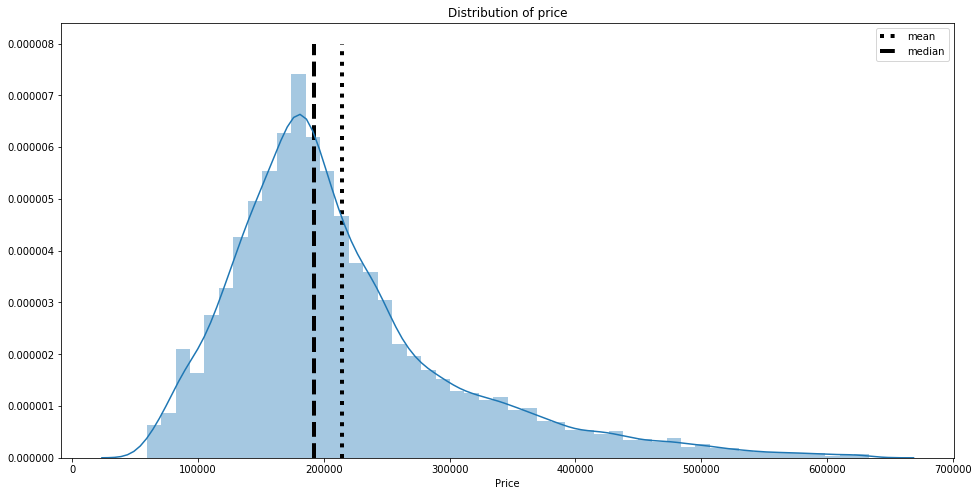

In [15]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.distplot(y['Price'])
ax.vlines(y['Price'].mean(), 0, 0.000008, label='mean', linestyle=':', linewidth=4)
ax.vlines(y['Price'].median(), 0, 0.000008, label='median', linestyle='--', linewidth=4)

plt.title('Distribution of price')
plt.legend()
plt.show()

#### outs

In [16]:
quant_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1']
bin_features = ['Ecology_2', 'Ecology_3', 'Shops_2']

In [17]:
pure_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
# pure_metrics_test = X_test.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T

,mean,std
Rooms,1.890500,0.839512
Square,56.315775,21.058732
LifeSquare,37.199645,86.241209
KitchenSquare,6.273300,28.560917
Floor,8.526700,5.241148
HouseFloor,12.609400,6.775974
HouseYear,3990.166300,200500.261427
Ecology_1,0.118858,0.119025
Social_1,24.687000,17.532614
Social_2,5352.157400,4006.799803


In [18]:
def outs(feature):
    bot = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][0].get_ydata()[0]
    top = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['caps'][1].get_ydata()[0]
    med = X.loc[:, quant_features].boxplot(column = [feature], return_type = 'dict')['medians'][0].get_ydata()[1]
    part = len(X.loc[:, quant_features][feature][(X.loc[:, quant_features][feature] > top) | (X.loc[:, quant_features][feature] < bot)])/len(X.loc[:, quant_features][feature])
    return {'bot': bot, 'med': med, 'top': top, 'part': part}


,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1
bot,0.0000,13.784865,0.370619,0.0000,1.0000,0.0000,1934.0000,0.000000,0.0,168.0000,0.0000,0.0000,0.0000
med,2.0000,52.513310,32.781260,6.0000,7.0000,13.0000,1977.0000,0.075424,25.0,5285.0000,2.0000,1.0000,3.0000
top,3.0000,102.056968,78.651539,21.0000,24.0000,29.0000,2020.0000,0.460556,74.0,14892.0000,11.0000,5.0000,11.0000
part,0.0172,0.024200,0.024000,0.0047,0.0066,0.0049,0.0038,0.006100,0.0,0.0176,0.0862,0.0099,0.0553


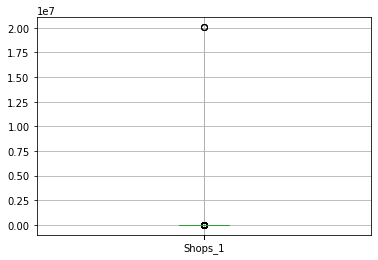

In [19]:
feature_out = pd.DataFrame({col: outs(col) for col in X.loc[:, quant_features].columns})
feature_out

#### ToDo
* выбросы меняем на медиану. 
* если floor > house floor, то заменяем floor на house floor
* удаляем Healthcare_1
* nan LifeSquare = Square - KitchenSquare - tech_square
* eсли общая площадь меньше суммы жилой и кухни, то LifeSquare = Square - KitchenSquare - tech_square - под вопросом. tech_square?

### 1. Clear outs

In [20]:
def clear_outs(X):
    for col in X.loc[:, quant_features].columns:
        X.loc[(X[col] > feature_out[col]['top']) | (X[col] < feature_out[col]['bot']), col] = feature_out[col]['med']

    X.loc[X['Floor'] > X['HouseFloor'], 'Floor'] = X.loc[X['Floor'] > X['HouseFloor'], 'HouseFloor']
    if 'Healthcare_1' in X.columns:
        X.drop('Healthcare_1', axis=1, inplace=True)
    X.loc[X['LifeSquare'].isna(), 'LifeSquare'] = X.loc[X['LifeSquare'].isna(), 'Square'] - X.loc[X['LifeSquare'].isna(), 'KitchenSquare'] - tech_square
    X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'LifeSquare'] = X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'Square'] - X.loc[X['Square'] < X['LifeSquare'] + X['KitchenSquare'], 'KitchenSquare']
    return X

In [21]:
X = clear_outs(X)
X_test = clear_outs(X_test)

In [22]:
clear_metrics = X.loc[:, quant_features].describe().loc[['mean', 'std']]
# clear_metrics_test = X_test.loc[:, quant_features].describe().loc[['mean', 'std']]
pure_metrics.T.join(clear_metrics.T, lsuffix = '_pure', rsuffix = '_tidy')

,mean_pure,std_pure,mean_tidy,std_tidy
Rooms,1.890500,0.839512,1.851400,0.758403
Square,56.315775,21.058732,54.654781,15.859586
LifeSquare,37.199645,86.241209,36.089502,14.687973
KitchenSquare,6.273300,28.560917,5.677200,3.877667
Floor,8.526700,5.241148,7.595200,5.121226
HouseFloor,12.609400,6.775974,12.481500,6.395479
HouseYear,3990.166300,200500.261427,1985.052600,18.050225
Ecology_1,0.118858,0.119025,0.116213,0.115070
Social_1,24.687000,17.532614,24.687000,17.532614
Social_2,5352.157400,4006.799803,5109.312600,3560.474465


### 2. Feature engineering

#### categorical data

In [23]:
np.unique(X['Ecology_2']), np.unique(X['Ecology_3']), np.unique(X['Shops_2'])

(array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object),
 array(['A', 'B'], dtype=object))

In [24]:
def bin_to_num(X):
    label_map = {'A': 0, 'B': 1}
    for feature in bin_features:
        X[feature] = X[feature].map(label_map)
    return X

In [25]:
X = bin_to_num(X)
X_test = bin_to_num(X_test)

In [26]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 14038 to 6306
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   DistrictId     10000 non-null  int64  
 1   Rooms          10000 non-null  float64
 2   Square         10000 non-null  float64
 3   LifeSquare     10000 non-null  float64
 4   KitchenSquare  10000 non-null  float64
 5   Floor          10000 non-null  float64
 6   HouseFloor     10000 non-null  float64
 7   HouseYear      10000 non-null  float64
 8   Ecology_1      10000 non-null  float64
 9   Ecology_2      10000 non-null  int64  
 10  Ecology_3      10000 non-null  int64  
 11  Social_1       10000 non-null  float64
 12  Social_2       10000 non-null  float64
 13  Social_3       10000 non-null  float64
 14  Helthcare_2    10000 non-null  float64
 15  Shops_1        10000 non-null  float64
 16  Shops_2        10000 non-null  int64  
dtypes: float64(13), int64(4)
memory usage: 1.4 MB


#### district clasterization

In [27]:
from sklearn.cluster import KMeans

In [28]:
features_wo_district = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Ecology_2', 'Ecology_3', 'Shops_2']

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.30, random_state = 42)

In [30]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler(with_mean = False)

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train.loc[:, features_wo_district]), columns = X_train.loc[:, features_wo_district].columns)
X_valid_scaled = pd.DataFrame(scaler.transform(X_valid.loc[:, features_wo_district]), columns = X_valid.loc[:, features_wo_district].columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test.loc[:, features_wo_district]), columns = X_test.loc[:, features_wo_district].columns)

In [31]:
# inertias = []

# for i in range(2, 10):
#     temp_model = KMeans(n_clusters=i, random_state=42)
#     temp_model.fit(X_train_scaled)
    
#     temp_inertia = temp_model.inertia_
    
#     inertias.append(temp_inertia)

# plt.plot(range(2, 10), inertias)

# plt.title('Inertia')

# plt.show()

In [32]:
kmeans = KMeans(n_clusters = 4, random_state = 42)

labels_train = kmeans.fit_predict(X_train_scaled)
labels_valid = kmeans.predict(X_valid_scaled)
labels_test = kmeans.predict(X_test_scaled)

In [33]:
# qty_train, qty_valid, qty_test = {}, {}, {}
# for label in np.unique(labels_train):   
#     qty_train[label] = len(X_train[labels_train == label])
#     qty_valid[label] = len(X_valid[labels_valid == label])
#     qty_test[label] = len(X_test[labels_test == label])
# qty_train, qty_valid, qty_test

In [34]:
for label in np.unique(labels_train): 
    X_train.loc[labels_train == label, 'Area'] = label
    X_valid.loc[labels_valid == label, 'Area'] = label
    X_test.loc[labels_test == label, 'Area'] = label
#     X_train.loc[labels_train == label, 'Area_qty'] = qty_train[label]
#     X_valid.loc[labels_valid == label, 'Area_qty'] = qty_valid[label]
#     X_test.loc[labels_test == label, 'Area_qty'] = qty_test[label] 

C:\Users\snetkova\Anaconda3\lib\site-packages\pandas\core\indexing.py:844: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\snetkova\Anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [35]:
X_train.describe()

,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Ecology_2,Ecology_3,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Shops_2,Area
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,50.560857,1.850571,54.671906,36.118164,5.705000,7.580000,12.512000,1985.083429,0.115184,0.990857,0.971143,24.767571,5121.975143,2.379429,1.262429,3.357571,0.916571,0.953714
std,43.744178,0.757465,15.858385,14.663557,3.901924,5.100297,6.389744,17.983265,0.114603,0.095187,0.167417,17.583889,3567.660628,2.663170,1.410922,3.081917,0.276549,0.885259
min,0.000000,0.000000,13.784865,0.370619,0.000000,0.000000,0.000000,1934.000000,0.000000,0.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,1.000000,41.771580,24.462107,1.000000,4.000000,9.000000,1974.000000,0.017647,1.000000,1.000000,6.000000,1564.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,37.000000,2.000000,52.513310,33.197429,6.000000,7.000000,13.000000,1977.000000,0.075424,1.000000,1.000000,25.000000,5285.000000,2.000000,1.000000,3.000000,1.000000,1.000000
75%,75.000000,2.000000,64.748732,45.639761,9.000000,11.000000,17.000000,2001.000000,0.194489,1.000000,1.000000,36.000000,7065.000000,3.000000,2.000000,5.000000,1.000000,2.000000
max,209.000000,3.000000,102.032801,90.032801,21.000000,24.000000,29.000000,2020.000000,0.460556,1.000000,1.000000,74.000000,14892.000000,11.000000,5.000000,11.000000,1.000000,3.000000


In [36]:
def area_bin(X):
    X = pd.get_dummies(X, columns=['Area'], prefix=['Area'])
    return(X)

X_train = area_bin(X_train)
X_test = area_bin(X_test)
X_valid = area_bin(X_valid)

In [37]:
# pd.get_dummies(X_train, columns=['Area'], prefix=['Area'])

In [38]:
final_features = ['Rooms', 'Square', 'LifeSquare', 'KitchenSquare', 'Floor',
       'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2', 'Ecology_3',
       'Social_1', 'Social_2', 'Social_3', 'Helthcare_2', 'Shops_1', 'Shops_2',
       'Area_0.0', 'Area_1.0', 'Area_2.0', 'Area_3.0']

In [39]:
# np.unique(X_train['Area'])

In [40]:
X_train = X_train[final_features]
X_valid = X_valid[final_features]
X_test = X_test[final_features]

In [41]:
# X_train.describe()

## Model

In [42]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

In [43]:
# X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = pd.DataFrame(X_train_scaled, columns = final_features)

# X_valid_scaled = scaler.fit_transform(X_valid)
# X_valid_scaled = pd.DataFrame(X_valid_scaled, columns = final_features)

# X_test_scaled = scaler.fit_transform(X_test)
# X_test_scaled = pd.DataFrame(X_test_scaled, columns = final_features)

In [44]:
# from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
model = LGBMRegressor(boosting_type = 'dart', num_leaves = 20, n_estimators = 515)

In [46]:
from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits = 5, shuffle = True, random_state = 42)
cv_score = cross_val_score(model, X_train, y_train, scoring = 'r2', cv = cv).mean()
cv_score

0.7341364365774403

#### model on full data

In [47]:
model.fit(X_train, y_train.values[: , 0])

LGBMRegressor(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=515, n_jobs=-1, num_leaves=20, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

In [48]:
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)

In [49]:
from sklearn.metrics import r2_score
R2_valid = r2_score(y_valid, y_pred)
R2_train = r2_score(y_train, y_pred_train)
R2_valid, R2_train

(0.7266826721520402, 0.8678450909293858)

#### by cluster

In [50]:
y_pred_valid = {}
y_pred_train = {}
for label in np.unique(labels_train):
    model.fit(X_train.loc[labels_train == label], y_train.values[: , 0][labels_train == label])
    y_pred_valid[label] = model.predict(X_valid.loc[labels_valid == label])
    y_pred_train[label] = model.predict(X_train.loc[labels_train == label])
    R2_valid = r2_score(y_valid[labels_valid == label], y_pred_valid[label])
    R2_train = r2_score(y_train[labels_train == label], y_pred_train[label])
    print(f'{label}: {R2_valid}, {R2_train}')

0: 0.5733412373769312, 0.8733261335454875
1: 0.7550973262150271, 0.9101117931041719
2: 0.5111862298071606, 0.8645417639433519
3: 0.46381826499973344, 0.9471112803743056


In [51]:
# y_valid_all = np.vstack([y_valid[labels_valid == 0], 
#                         y_valid[labels_valid == 1], 
#                         y_valid[labels_valid == 2], 
#                         y_valid[labels_valid == 3], 
# #                         y_valid[labels_valid == 4], 
# #                         y_valid[labels_valid == 5]
#                         ])
# y_valid_pred_all = np.hstack([y_pred_valid[0],
#                              y_pred_valid[1],
#                              y_pred_valid[2],
#                              y_pred_valid[3],
# #                              y_pred_valid[4],
# #                              y_pred_valid[5]
#                              ])

# r2_score(y_valid_all, y_valid_pred_all)

0.7098464860894861